In [1]:
import pandas as pd
import numpy as np
import nltk
import pickle
from collections import Counter
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from gensim.models import CoherenceModel

In [2]:
df = pd.read_csv('AFL Cleaned Text.csv')
type(df['processed_clean_list'][0])

str

In [3]:
df

,Unnamed: 0.1,Unnamed: 0,Speech Title,Url Link,Date,Speech Text,Speaker,clean_text,processed_clean,processed_clean_list
0,0,0,Shuler: We Can Make Dr. King's Dream a Reality,https://aflcio.org/speeches/shuler-we-can-make...,1-13-2023,AFL-CIO President Liz Shuler delivered the fol...,Shuler,afl cio president liz shuler delivered followi...,afl cio president liz shuler delivered followi...,"['afl', 'cio', 'president', 'liz', 'shuler', '..."
1,1,1,Redmond: We Must Be That Mighty Force for Change,https://aflcio.org/speeches/redmond-we-must-be...,1-13-2023,AFL-CIO Secretary-Treasurer Fred Redmond deliv...,Redmond,afl cio secretary treasurer fred redmond deliv...,afl cio secretary treasurer fred redmond deliv...,"['afl', 'cio', 'secretary', 'treasurer', 'fred..."
2,2,2,Redmond: Technological Achievement Should Not ...,https://aflcio.org/speeches/redmond-technologi...,1-6-2023,AFL-CIO Secretary-Treasurer Fred Redmond's rem...,Redmond,afl cio secretary treasurer fred redmonds rema...,afl cio secretary treasurer fred redmonds rema...,"['afl', 'cio', 'secretary', 'treasurer', 'fred..."
3,3,3,Shuler: Innovation Should Empower Workers and ...,https://aflcio.org/speeches/shuler-innovation-...,1-6-2023,AFL-CIO President Liz Shuler's remarks as prep...,Shuler,afl cio president liz shulers remarks prepared...,afl cio president liz shulers remarks prepared...,"['afl', 'cio', 'president', 'liz', 'shulers', ..."
4,4,4,Redmond: We Need the Missouri Labor Movement N...,https://aflcio.org/speeches/redmond-we-need-mi...,8-22-2022,Secretary-Treasurer Fred Redmond delivered the...,Redmond,secretary treasurer fred redmond delivered fol...,secretary treasurer fred redmond delivered fol...,"['secretary', 'treasurer', 'fred', 'redmond', ..."
...,...,...,...,...,...,...,...,...,...,...
404,404,404,Shuler 2013 AFL-CIO Convention Acceptance,https://aflcio.org/speeches/shuler-2013-afl-ci...,9-10-2013,Wow! Thank you. Thank you all so much.Brother...,Shuler,wow thank thank brothers sisters true joy stan...,wow thank thank brothers sisters true joy stan...,"['wow', 'thank', 'thank', 'brothers', 'sisters..."
405,405,405,Gebre 2013 AFL-CIO Convention Acceptance,https://aflcio.org/speeches/gebre-2013-afl-cio...,9-10-2013,"Thank you, brothers and sisters, for your conf...",Gebre,thank brothers sisters confidence want thank j...,thank brothers sisters confidence want thank j...,"['thank', 'brothers', 'sisters', 'confidence',..."
406,406,406,Trumka 2013 AFL-CIO Convention Keynote,https://aflcio.org/speeches/trumka-2013-afl-ci...,9-9-2013,Thank you. Thank you for being here. Together...,Trumka,thank thank together solidarity look around gr...,thank thank together solidarity look around gr...,"['thank', 'thank', 'together', 'solidarity', '..."
407,407,407,Remarks of AFL-CIO President Richard L. Trumka...,https://aflcio.org/speeches/remarks-afl-cio-pr...,9-6-2013,Thank you for all for coming together here in ...,Trumka,thank coming together los angeles thank kind i...,thank coming together los angeles thank kind i...,"['thank', 'coming', 'together', 'los', 'angele..."


In [4]:
words = df['processed_clean_list']
words

0      ['afl', 'cio', 'president', 'liz', 'shuler', '...
1      ['afl', 'cio', 'secretary', 'treasurer', 'fred...
2      ['afl', 'cio', 'secretary', 'treasurer', 'fred...
3      ['afl', 'cio', 'president', 'liz', 'shulers', ...
4      ['secretary', 'treasurer', 'fred', 'redmond', ...
                             ...                        
404    ['wow', 'thank', 'thank', 'brothers', 'sisters...
405    ['thank', 'brothers', 'sisters', 'confidence',...
406    ['thank', 'thank', 'together', 'solidarity', '...
407    ['thank', 'coming', 'together', 'los', 'angele...
408    ['thank', 'mike', 'great', 'brother', 'thank',...
Name: processed_clean_list, Length: 409, dtype: object

In [5]:
words = df['processed_clean_list']
allwords = []
for list_word in words:
    allwords += list_word

In [6]:
# Converting string to list
#res = ast.literal_eval(ini_list)

def res(string_list):
    return ast.literal_eval(string_list)
    

In [7]:
df['processed_clean_list'] = df['processed_clean_list'].apply(res)

In [8]:
# creating a wordcloud of the most common words
words = df['processed_clean_list']
allwords = []
for wordlist in words:
    print(wordlist)
    allwords += wordlist


# Create a new list without elements that are only 't'
allwords = [x for x in allwords if x != 't' or len(x) > 1]

allwords = [x for x in allwords if x != 're' or len(x) > 2]



text = ' '.join(allwords)


['afl', 'cio', 'president', 'liz', 'shuler', 'delivered', 'following', 'remarks', 'prepared', 'afl', 'cio', 'dr', 'martin', 'luther', 'king', 'jr', 'civil', 'human', 'rights', 'conference', 'hello', 'everyone', 'welcome', 'dr', 'martin', 'luther', 'king', 'jr', 'civil', 'human', 'rights', 'conference', 'joined', 'us', 'across', 'country', 'welcome', 'd', 'c', 'want', 'recognize', 'hard', 'work', 'goes', 'bringing', 'events', 'like', 'one', 'life', 'say', 'special', 'thanks', 'secretary', 'treasurer', 'fred', 'redmond', 'team', 'tireless', 'well', 'union', 'supporters', 'liuna', 'steelworkers', 'mlbpa', 'union', 'plus', 'sponsorship', 'year', 'conference', 'theme', 'claiming', 'power', 'protecting', 'democracy', 'timely', 'important', 'past', 'years', 'seen', 'rise', 'misinformation', 'political', 'polarization', 'dividing', 'communities', 'rise', 'attacks', 'basic', 'freedoms', 'like', 'right', 'vote', 'organize', 'union', 'attacks', 'democracy', 'labor', 'movement', 'respond', 'know',

In [9]:
words

0      [afl, cio, president, liz, shuler, delivered, ...
1      [afl, cio, secretary, treasurer, fred, redmond...
2      [afl, cio, secretary, treasurer, fred, redmond...
3      [afl, cio, president, liz, shulers, remarks, p...
4      [secretary, treasurer, fred, redmond, delivere...
                             ...                        
404    [wow, thank, thank, brothers, sisters, true, j...
405    [thank, brothers, sisters, confidence, want, t...
406    [thank, thank, together, solidarity, look, aro...
407    [thank, coming, together, los, angeles, thank,...
408    [thank, mike, great, brother, thank, inviting,...
Name: processed_clean_list, Length: 409, dtype: object

In [10]:
def remove_re(lst, bad_string):
    return [s for s in lst if s != bad_string]

# Example usage
my_list = ['read', 're', 'reply', 'care', 'respect', 're']
print(remove_re(my_list, 're'))


['read', 'reply', 'care', 'respect']


In [11]:
import pandas as pd

# Create a sample Series with lists
my_series = pd.Series([['read', 're'], ['reply', 'care'], ['respect', 're']])

# Define the remove_re function to remove a specified bad string from all lists
def remove_string(lst, bad_string):
    return [s for s in lst if s != bad_string]

def remove_bad_string(series, bad_string):
    return series.apply(lambda lst: remove_string(lst, bad_string))

# Apply the remove_bad_string function to the Series
my_series = remove_bad_string(my_series, 're')

# Print the modified Series
print(my_series)

words = remove_bad_string(words, 're')
words = remove_bad_string(words, 'll')
words = remove_bad_string(words, 't')


0           [read]
1    [reply, care]
2        [respect]
dtype: object


In [12]:
import gensim
from gensim import corpora
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

/Users/jeffreypan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


number of topics:  4

Perplexity:  -7.844445816799232

Coherence Score:  0.3368418484299624
number of topics:  5

Perplexity:  -7.8535412071089805

Coherence Score:  0.3319856266903701
number of topics:  6

Perplexity:  -7.879113096459863

Coherence Score:  0.3913971288922524
number of topics:  7

Perplexity:  -7.9143007553089495

Coherence Score:  0.35171796170921776
number of topics:  8

Perplexity:  -7.979277299568432

Coherence Score:  0.35860835217122095
number of topics:  9

Perplexity:  -8.089044490400159

Coherence Score:  0.36723786966590577
number of topics:  10

Perplexity:  -8.283412631991771

Coherence Score:  0.3524720952928499


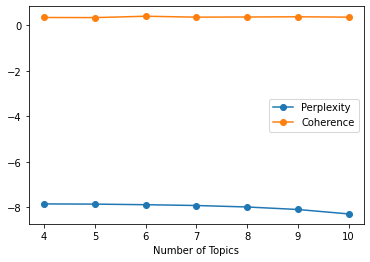

In [18]:
import matplotlib.pyplot as plt

dictionary = corpora.Dictionary(words)
corpus = [dictionary.doc2bow(word) for word in words]

# create empty lists to store the scores
perplexity_scores = []
coherence_scores = []

for number_topics in range(4, 11):
    print('number of topics: ', number_topics)

    lda_model = gensim.models.LdaModel(corpus=corpus,
                                       id2word=dictionary,
                                       num_topics=number_topics,
                                       random_state=100,
                                       update_every=1,
                                       chunksize=10,
                                       passes=10,
                                       alpha='auto',
                                       per_word_topics=True)

    # Compute Perplexity
    perplexity_score = lda_model.log_perplexity(corpus)
    perplexity_scores.append(perplexity_score)
    print('\nPerplexity: ', perplexity_score)

    # Compute Coherence Score
    coherence_model_lda = CoherenceModel(model=lda_model, texts=words, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_scores.append(coherence_lda)
    print('\nCoherence Score: ', coherence_lda)



It is not good if the perplexity score is becoming more negative. The perplexity score is a measure of how well the LDA model is able to predict the held-out data (i.e., data that was not used to train the model). The lower the perplexity score, the better the model is at predicting the held-out data.

However, the perplexity score is a logarithmic measure, so a more negative score actually corresponds to a higher perplexity. In other words, if the perplexity score is becoming more negative, it means that the model is becoming worse at predicting the held-out data, which is a sign that the model is overfitting the training data and may not generalize well to new data.

/Users/jeffreypan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


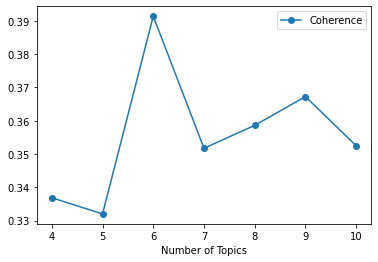

In [19]:
# plot the scores
#plt.plot(range(4, 11), perplexity_scores, '-o', label='Perplexity')
plt.plot(range(4, 11), coherence_scores, '-o', label='Coherence')
plt.xlabel('Number of Topics')
plt.legend()
plt.show()


/Users/jeffreypan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


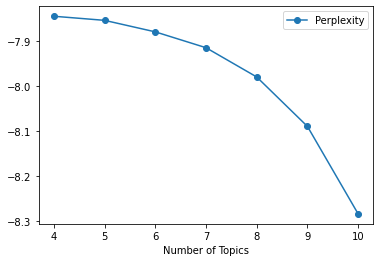

In [20]:
# plot the scores
plt.plot(range(4, 11), perplexity_scores, '-o', label='Perplexity')
plt.xlabel('Number of Topics')
plt.legend()
plt.show()


In [16]:
dictionary = corpora.Dictionary(words)
corpus = [dictionary.doc2bow(word) for word in words]

# define the number of topics to identify
num_topics = 6


# build the LDA model
lda_model = gensim.models.LdaModel(corpus=corpus,
                                   id2word=dictionary,
                                   num_topics=num_topics,
                                   random_state=100,
                                   update_every=1,
                                   chunksize=10,
                                   passes=10,
                                   alpha='auto',
                                   per_word_topics=True)

# visualize the topics using pyLDAvis
vis_data = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis_data)

# print the top words for each topic
for topic in lda_model.print_topics():
    print(topic)

/Users/jeffreypan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/jeffreypan/opt/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


(0, '0.024*"global" + 0.018*"climate" + 0.013*"crisis" + 0.013*"policy" + 0.009*"growth" + 0.009*"economic" + 0.009*"partnership" + 0.009*"unemployment" + 0.008*"u" + 0.007*"business"')
(1, '0.018*"work" + 0.015*"workers" + 0.015*"working" + 0.015*"people" + 0.010*"jobs" + 0.009*"labor" + 0.009*"movement" + 0.009*"good" + 0.009*"want" + 0.009*"together"')
(2, '0.016*"trade" + 0.016*"rights" + 0.011*"people" + 0.010*"world" + 0.010*"labor" + 0.010*"today" + 0.010*"us" + 0.008*"justice" + 0.008*"economic" + 0.007*"united"')
(3, '0.020*"fast" + 0.018*"takes" + 0.011*"god" + 0.009*"im" + 0.008*"lessons" + 0.008*"asked" + 0.007*"nafta" + 0.007*"struggle" + 0.007*"dad" + 0.007*"agreed"')
(4, '0.023*"america" + 0.020*"us" + 0.014*"together" + 0.012*"stand" + 0.012*"brothers" + 0.011*"sisters" + 0.011*"people" + 0.011*"working" + 0.009*"every" + 0.009*"american"')
(5, '0.016*"usa" + 0.004*"conservation" + 0.002*"rod" + 0.001*"youth" + 0.001*"dinners" + 0.001*"shoots" + 0.001*"susan" + 0.001*"s

In [17]:
pyLDAvis.display(vis_data)

/Users/jeffreypan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Analysis

Topic 0: This topic seems to be related to labor and the economy, with terms such as "workers", "jobs", "labor", and "wages" appearing as top relevant terms.

Topic 1: This topic seems to be related to union activities, with terms such as "union", "together", "members", and "picket" appearing as top relevant terms.

Topic 2: This topic seems to be related to the United States and its people, with terms such as "america", "people", "movement", and "stand" appearing as top relevant terms.

Topic 3: This topic seems to be related to global trade and policy, with terms such as "trade", "global", "world", and "policy" appearing as top relevant terms.

The pyLDAvis visualization generated by the code above provides an interactive tool for exploring the topics and their relationships.

The visualization consists of two main parts: a topic relevance plot and an intertopic distance plot.

The topic relevance plot shows the top words for each topic, arranged in a circle. The size of each word corresponds to its frequency in the corpus, and the distance between words represents their similarity. The relevance of each topic is represented by the red bars on the right-hand side of the plot. The longer the bar, the more relevant the topic is to the overall corpus.

The intertopic distance plot shows the relationships between the topics. Topics that are more similar to each other are located closer together in the plot. The size of each bubble corresponds to the prevalence of the topic in the corpus.

Using this visualization, we can gain several insights into the topics and their relationships:

We can identify the top words associated with each topic. This can help us understand the main themes and concepts represented by the topics.




https://github.com/uwdata/termite-treetm/blob/master/README.md
    
http://vis.stanford.edu/papers/termite